<a href="https://colab.research.google.com/github/Cousigames/Assignment1/blob/main/comp472_asg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

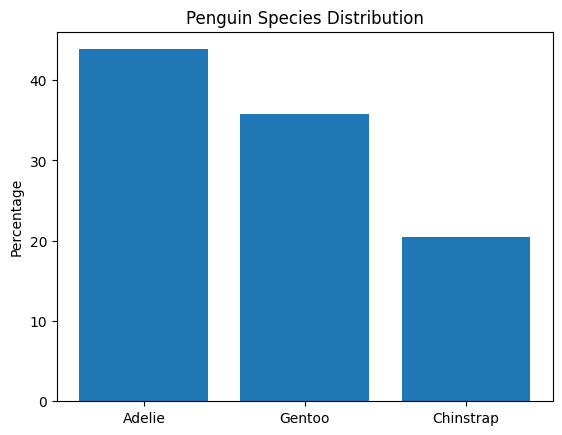

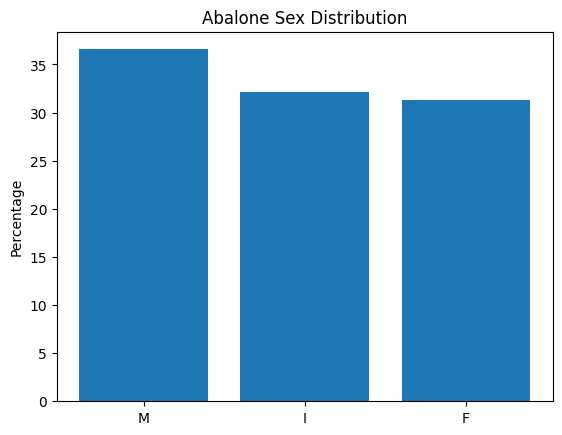

In [ ]:
# Question 1-3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load Penguin dataset
penguins = pd.read_csv('/content/penguins.csv')

# Method 1: One-hot encoding
#Convert island and sex into numerial format using one-hot encoding
one_hot_encoder = OneHotEncoder()
penguins_encoded = pd.DataFrame(one_hot_encoder.fit_transform(penguins[['island','sex']]).toarray())

#Convert into categories
penguins['island'] = penguins['island'].astype('category').cat.codes
penguins['sex'] = penguins['sex'].astype('category').cat.codes

# Load the Abalone dataset
abalone = pd.read_csv('/content/abalone.csv')

# Abalone features are all numerical so no need to convert

# Plotting the class distribution for the Penguin dataset
penguin_classes = penguins['species'].value_counts(normalize=True)*100
plt.bar(penguin_classes.index, penguin_classes.values)
plt.title('Penguin Species Distribution')
plt.ylabel('Percentage')
plt.savefig('penguin-classes.png', format= 'png')
plt.show()

#Split the dataset using train test split
x_penguins = penguins.drop('species', axis=1) # The Features
y_penguins = penguins['species'] #The Labels
x_train_penguins, x_test_penguins, y_train_penguins, y_test_penguins = train_test_split(x_penguins, y_penguins, random_state=42)


# Plotting the class distribution for the Abalone dataset
abalone_classes = abalone['Type'].value_counts(normalize=True)*100
plt.bar(abalone_classes.index, abalone_classes.values)
plt.title('Abalone Sex Distribution')
plt.ylabel('Percentage')
plt.savefig('abalone-classes.png', format= 'png')
plt.show()

#Split the dataset using train test split
x_abalone = abalone.drop('Type', axis=1) # The Features
y_abalone = abalone['Type'] #The Labels
x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(x_abalone, y_abalone, random_state=42)


In [ ]:
# Question 4-5
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Penguin dataset
penguins = pd.read_csv('/content/penguins.csv')

# One-hot encode the categorical features
categorical_features = ['island', 'sex']
one_hot_encoder = OneHotEncoder(sparse=False)
penguins_encoded = one_hot_encoder.fit_transform(penguins[categorical_features])
columns = one_hot_encoder.get_feature_names_out(categorical_features)
penguins_encoded_df = pd.DataFrame(penguins_encoded, columns=columns)

# Concatenate the one-hot encoded features with the rest of the dataset
penguins = pd.concat([penguins.drop(categorical_features + ['species'], axis=1), penguins_encoded_df, penguins['species']], axis=1)

# Define features (X) and target (y)
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']

# Split the data into training and testing sets
X_train_penguins, X_test_penguins, y_train_penguins, y_test_penguins = train_test_split(
    X_penguins, y_penguins, test_size=0.2, random_state=42
)

# Base Decision Tree Classifier
base_dt_penguins = DecisionTreeClassifier(random_state=42)
base_dt_penguins.fit(X_train_penguins, y_train_penguins)

# Visualize Base-DT
plt.figure(figsize=(12, 8))
plot_tree(base_dt_penguins, filled=True)
plt.title('Base Decision Tree for Penguin Dataset')
plt.savefig('base_dt_penguins.png')
plt.close()

# Grid Search for Top-DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}
grid_search_dt_penguins = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt_penguins.fit(X_train_penguins, y_train_penguins)
top_dt_penguins = grid_search_dt_penguins.best_estimator_

# Visualize Top-DT
plt.figure(figsize=(12, 8))
plot_tree(top_dt_penguins, filled=True)
plt.title('Top Decision Tree for Penguin Dataset')
plt.savefig('top_dt_penguins.png')
plt.close()

# Base Multi-Layer Perceptron Classifier
base_mlp_penguins = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=42)
base_mlp_penguins.fit(X_train_penguins, y_train_penguins)

# Grid Search for Top-MLP
param_grid_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
grid_search_mlp_penguins = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5)
grid_search_mlp_penguins.fit(X_train_penguins, y_train_penguins)
top_mlp_penguins = grid_search_mlp_penguins.best_estimator_

# Define a function to evaluate a model and save the results to a text file
def evaluate_and_save_results(model, X_test, y_test, model_name, dataset_name, file_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    with open(file_name, 'a') as f:
        f.write(f"{'*' * 80}\n")
        f.write(f"Model: {model_name}\nDataset: {dataset_name}\n")
        f.write(f"Accuracy: {accuracy}\n")
        f.write(f"Confusion Matrix:\n{conf_matrix}\n")
        f.write(f"Classification Report:\n{class_report}\n")
        f.write(f"{'*' * 80}\n\n")

# File name to save the evaluation results
results_file_penguins = 'penguin-performance.txt'

# Evaluate and save results for all models on the Penguin dataset
evaluate_and_save_results(base_dt_penguins, X_test_penguins, y_test_penguins, 'Base-DT', 'Penguin', results_file_penguins)
evaluate_and_save_results(top_dt_penguins, X_test_penguins, y_test_penguins, 'Top-DT', 'Penguin', results_file_penguins)
evaluate_and_save_results(base_mlp_penguins, X_test_penguins, y_test_penguins, 'Base-MLP', 'Penguin', results_file_penguins)
evaluate_and_save_results(top_mlp_penguins, X_test_penguins, y_test_penguins, 'Top-MLP', 'Penguin', results_file_penguins)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skl

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Abalone dataset
abalone = pd.read_csv('/content/abalone.csv')

# One-hot encode the categorical feature 'Type'
one_hot_encoder = OneHotEncoder(sparse=False)  # Create the OneHotEncoder object
abalone_encoded = one_hot_encoder.fit_transform(abalone[['Type']])  # Perform one-hot encoding
columns = one_hot_encoder.get_feature_names_out(['Type'])  # Get the new column names for the encoded matrix
abalone_encoded_df = pd.DataFrame(abalone_encoded, columns=columns)  # Create a DataFrame from the encoded matrix

# Concatenate the one-hot encoded features with the rest of the dataset
abalone = pd.concat([abalone.drop('Type', axis=1), abalone_encoded_df], axis=1)  # Drop the original 'Type' column

# Define features (X) and target (y)
# Assuming 'Rings' is the target column, otherwise replace 'Rings' with the correct target column name
X_abalone = abalone.drop('Rings', axis=1)  # Drop the target column to create feature set
y_abalone = abalone['Rings']  # 'Rings' is the target variable

# Split the data into training and testing sets
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(
    X_abalone, y_abalone, test_size=0.2, random_state=42
)
# Split the data into training and testing sets
X_train_abalone, X_test_abalone, y_train_abalone, y_test_abalone = train_test_split(
    X_abalone, y_abalone, test_size=0.2, random_state=42
)

# Base Decision Tree Classifier
base_dt_abalone = DecisionTreeClassifier(random_state=42, max_depth=3)
base_dt_abalone.fit(X_train_abalone, y_train_abalone)

# Visualize Base-DT
plt.figure(figsize=(12, 8))
plot_tree(base_dt_abalone, filled=True)
plt.title('Base Decision Tree for Abalone Dataset')
plt.savefig('_base_dt_abalone.png')
plt.close()

# Grid Search for Top-DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}
grid_search_dt_abalone = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt_abalone.fit(X_train_abalone, y_train_abalone)
top_dt_abalone = grid_search_dt_abalone.best_estimator_

# Visualize Top-DT
plt.figure(figsize=(12, 8))
plot_tree(top_dt_abalone, filled=True)
plt.title('Top Decision Tree for Abalone Dataset')
plt.savefig('_top_dt_abalone.png')
plt.close()

# Base Multi-Layer Perceptron Classifier
base_mlp_abalone = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=42)
base_mlp_abalone.fit(X_train_abalone, y_train_abalone)

# Grid Search for Top-MLP
param_grid_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
grid_search_mlp_abalone = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, cv=5)
grid_search_mlp_abalone.fit(X_train_abalone, y_train_abalone)
top_mlp_abalone = grid_search_mlp_abalone.best_estimator_

# Define a function to evaluate a model and save the results to a text file
def evaluate_and_save_results(model, X_test, y_test, model_name, dataset_name, file_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    with open(file_name, 'a') as f:
        f.write(f"{'*' * 80}\n")
        f.write(f"Model: {model_name}\nDataset: {dataset_name}\n")
        f.write(f"Accuracy: {accuracy}\n")
        f.write(f"Confusion Matrix:\n{conf_matrix}\n")
        f.write(f"Classification Report:\n{class_report}\n")
        f.write(f"{'*' * 80}\n\n")

# File name to save the evaluation results
results_file_abalone = 'abalone-performance.txt'

# Evaluate and save results for Base-DT on the Abalone dataset
evaluate_and_save_results(base_dt_abalone, X_test_abalone, y_test_abalone, 'Base-DT', 'Abalone', results_file_abalone)

# Evaluate and save results for Top-DT on the Abalone dataset
evaluate_and_save_results(top_dt_abalone, X_test_abalone, y_test_abalone, 'Top-DT', 'Abalone', results_file_abalone)

# Evaluate and save results for Base-MLP on the Abalone dataset
evaluate_and_save_results(base_mlp_abalone, X_test_abalone, y_test_abalone, 'Base-MLP', 'Abalone', results_file_abalone)

# Evaluate and save results for Top-MLP on the Abalone dataset
evaluate_and_save_results(top_mlp_abalone, X_test_abalone, y_test_abalone, 'Top-MLP', 'Abalone', results_file_abalone)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stoch

In [7]:
# Define a function to evaluate a model and save the results to a text file
def evaluate_and_save_results(model, X_test, y_test, model_name, dataset_name, file_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    with open(file_name, 'a') as f:
        f.write(f"{'*' * 80}\n")
        f.write(f"Model: {model_name}\nDataset: {dataset_name}\n")
        f.write(f"Accuracy: {accuracy}\n")
        f.write(f"Confusion Matrix:\n{conf_matrix}\n")
        f.write(f"Classification Report:\n{class_report}\n")
        f.write(f"{'*' * 80}\n\n")

# File name to save the evaluation results
results_file_penguins = 'penguin-performance.txt'

# Evaluate and save results for all models on the Penguin dataset
evaluate_and_save_results(base_dt_penguins, X_test_penguins, y_test_penguins, 'Base-DT', 'Penguin', results_file_penguins)
evaluate_and_save_results(top_dt_penguins, X_test_penguins, y_test_penguins, 'Top-DT', 'Penguin', results_file_penguins)
evaluate_and_save_results(base_mlp_penguins, X_test_penguins, y_test_penguins, 'Base-MLP', 'Penguin', results_file_penguins)
evaluate_and_save_results(top_mlp_penguins, X_test_penguins, y_test_penguins, 'Top-MLP', 'Penguin', results_file_penguins)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [8]:
# Define a function to evaluate a model and save the results to a text file
def evaluate_and_save_results(model, X_test, y_test, model_name, dataset_name, file_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    with open(file_name, 'a') as f:
        f.write(f"{'*' * 80}\n")
        f.write(f"Model: {model_name}\nDataset: {dataset_name}\n")
        f.write(f"Accuracy: {accuracy}\n")
        f.write(f"Confusion Matrix:\n{conf_matrix}\n")
        f.write(f"Classification Report:\n{class_report}\n")
        f.write(f"{'*' * 80}\n\n")

# File name to save the evaluation results
results_file_abalone = 'Abalone-performance.txt'

# Evaluate and save results for Base-DT on the Abalone dataset
evaluate_and_save_results(base_dt_abalone, X_test_abalone, y_test_abalone, 'Base-DT', 'Abalone', results_file_abalone)

# Evaluate and save results for Top-DT on the Abalone dataset
evaluate_and_save_results(top_dt_abalone, X_test_abalone, y_test_abalone, 'Top-DT', 'Abalone', results_file_abalone)

# Evaluate and save results for Base-MLP on the Abalone dataset
evaluate_and_save_results(base_mlp_abalone, X_test_abalone, y_test_abalone, 'Base-MLP', 'Abalone', results_file_abalone)

# Evaluate and save results for Top-MLP on the Abalone dataset
evaluate_and_save_results(top_mlp_abalone, X_test_abalone, y_test_abalone, 'Top-MLP', 'Abalone', results_file_abalone)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


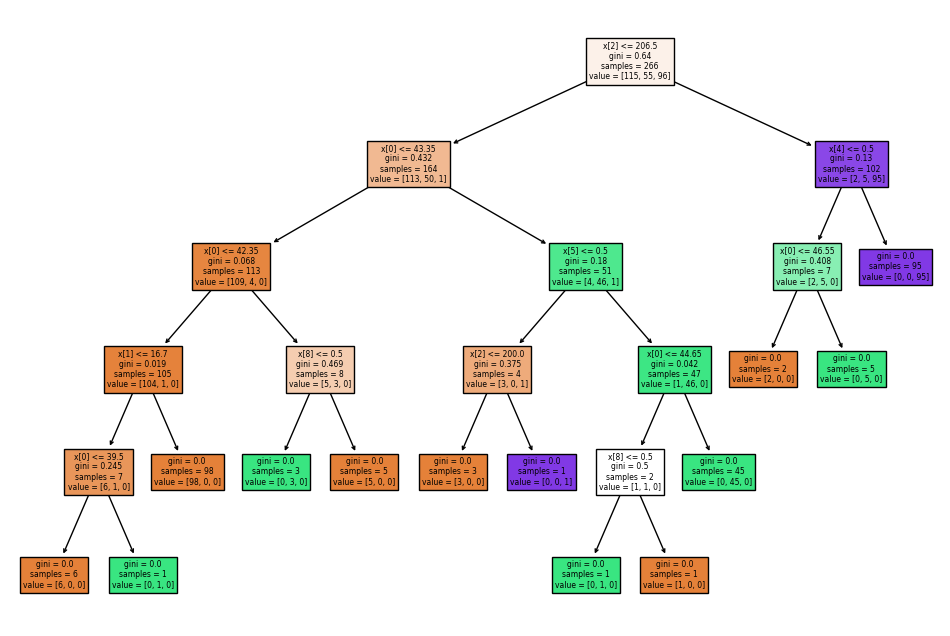

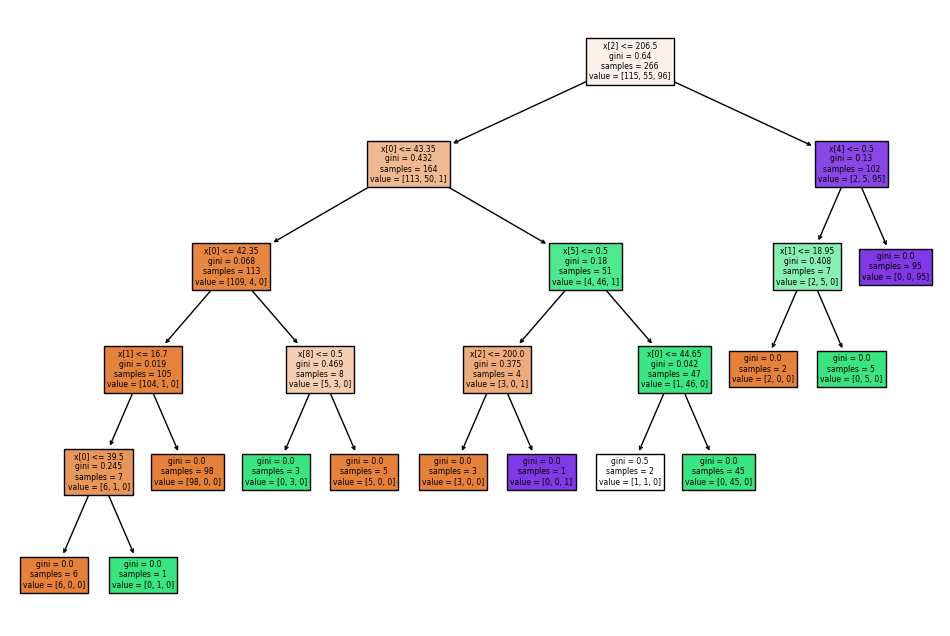

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


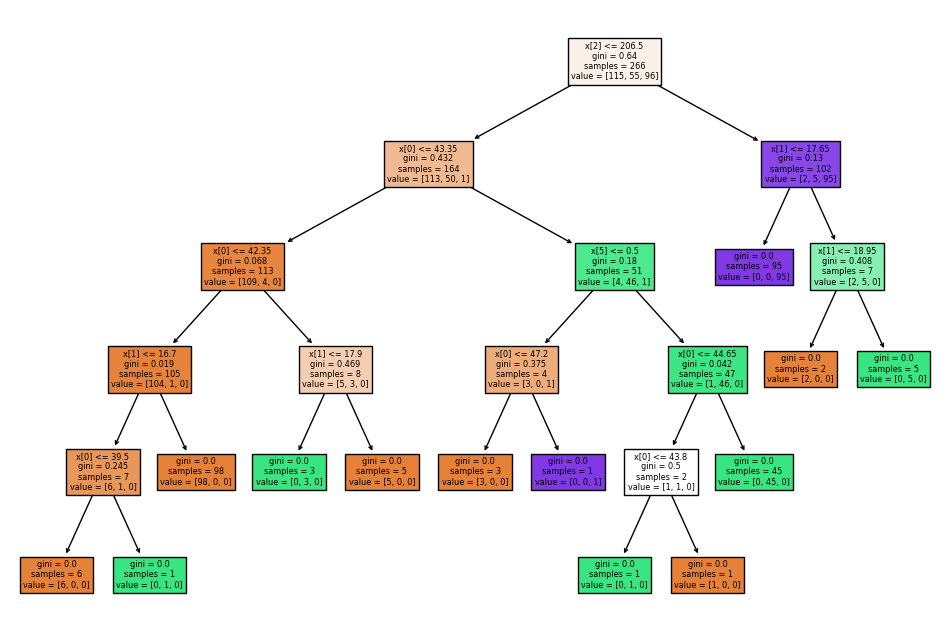

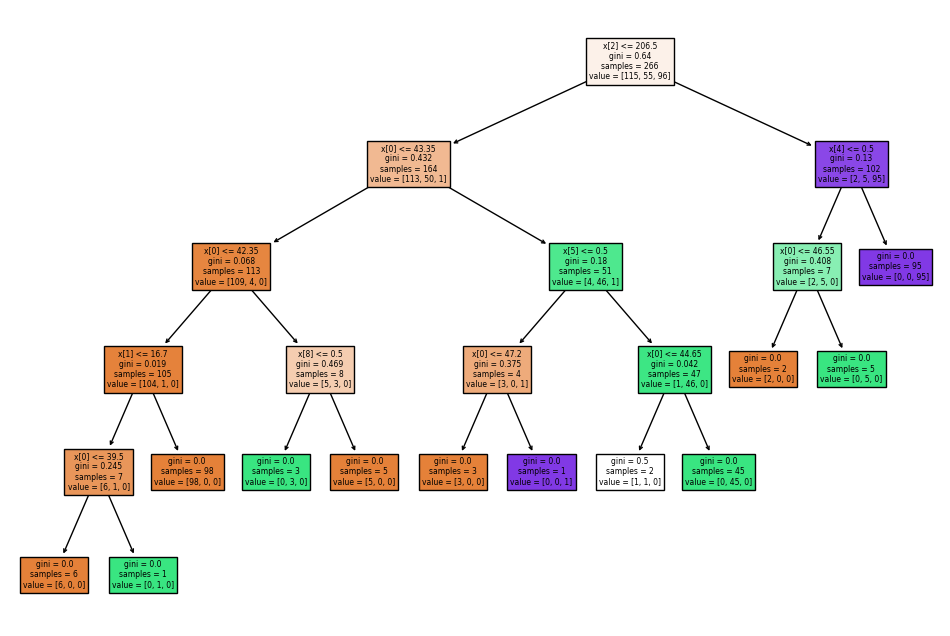

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [10]:
#Question 6
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder


import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Loading the penguin dataset here
penguins = pd.read_csv('penguins.csv')

# One-hot encode the categorical features needed
categorical_features = ['island', 'sex']
one_hot_encoder = OneHotEncoder(sparse=False)
penguins_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(penguins[categorical_features]),
    columns=one_hot_encoder.get_feature_names_out(categorical_features)
)

# Drop the original categorical features and concatenate the one-hot encoded features
penguins = pd.concat([
    penguins.drop(categorical_features, axis=1),
    penguins_encoded
], axis=1)

# Replace 'species' with the actual target column name in our dataset
X = penguins.drop('species', axis=1)
y = penguins['species']

# Split the data into training and testing sets to perform operation
x_train_penguins, x_test_penguins, y_train_penguins, y_test_penguins = train_test_split(X, y, test_size=0.2, random_state=42)



# Base-DT
base_dt = DecisionTreeClassifier()
base_dt.fit(x_train_penguins, y_train_penguins)

# Visualize Base-DT
plt.figure(figsize=(12,8))
plot_tree(base_dt, filled=True)
plt.savefig('base_dt_tree.png')
plt.show()

# Grid Search for Top-DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(x_train_penguins, y_train_penguins)

# Train and Visualize Top-DT
top_dt = grid_search_dt.best_estimator_
plt.figure(figsize=(12,8))
plot_tree(top_dt, filled=True)
plt.savefig('top_dt_tree.png')
plt.show()

# Base-MLP
base_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
base_mlp.fit(x_train_penguins, y_train_penguins)

# Grid Search for Top-MLP
param_grid_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
grid_search_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=5)
grid_search_mlp.fit(x_train_penguins, y_train_penguins)

# Train Top-MLP
top_mlp = grid_search_mlp.best_estimator_


# Function to perform training and evaluation
def calculate_metrics(model, x_train_penguins, x_test_penguins, y_train_penguins, y_test_penguins):
    model.fit(x_train_penguins, y_train_penguins)
    predictions = model.predict(x_test_penguins)
    accuracy = accuracy_score(y_test_penguins, predictions)
    macro_f1 = f1_score(y_test_penguins, predictions, average='macro')
    weighted_f1 = f1_score(y_test_penguins, predictions, average='weighted')
    return accuracy, macro_f1, weighted_f1

# Changing Dataset

# Loading the abalone dataset here
abalone = pd.read_csv('abalone.csv')

# One-hot encode the categorical features needed
categorical_features = ['Type']
one_hot_encoder = OneHotEncoder(sparse=False)
abalone_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(abalone[categorical_features]),
    columns=one_hot_encoder.get_feature_names_out(categorical_features)
)

# Drop the original categorical features and concatenate the one-hot encoded features
abalone = pd.concat([
    abalone.drop(categorical_features, axis=1),
    abalone_encoded
], axis=1)

# Replace 'species' with the actual target column name in our dataset
#X = abalone.drop('Type', axis=1)
# y = abalone['Type']

# Split the data into training and testing sets to perform operation
x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(X, y, test_size=0.2, random_state=42)
# Base-DT
base_dt = DecisionTreeClassifier()
base_dt.fit(x_train_abalone, y_train_abalone)

# Visualize Base-DT
plt.figure(figsize=(12,8))
plot_tree(base_dt, filled=True)
plt.savefig('base_dt_tree.png')
plt.show()

# Grid Search for Top-DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(x_train_abalone, y_train_abalone)

# Train and Visualize Top-DT
top_dt = grid_search_dt.best_estimator_
plt.figure(figsize=(12,8))
plot_tree(top_dt, filled=True)
plt.savefig('top_dt_tree.png')
plt.show()

# Base-MLP
base_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
base_mlp.fit(x_train_abalone, y_train_abalone)

# Grid Search for Top-MLP
param_grid_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
grid_search_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=5)
grid_search_mlp.fit(x_train_abalone, y_train_abalone)

# Train Top-MLP
top_mlp = grid_search_mlp.best_estimator_


# Function to perform training and evaluation
def calculate_metrics(model, x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone):
    model.fit(x_train_abalone, y_train_abalone)
    predictions = model.predict(x_test_abalone)
    accuracy = accuracy_score(y_test_abalone, predictions)
    macro_f1 = f1_score(y_test_abalone, predictions, average='macro')
    weighted_f1 = f1_score(y_test_abalone, predictions, average='weighted')
    return accuracy, macro_f1, weighted_f1

# Lists to store accuracies and F1 scores
metrics_penguin = {
    'Base-DT': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []},
    'Top-DT': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []},
    'Base-MLP': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []},
    'Top-MLP': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []}
}

metrics_abalone = {
    'Base-DT': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []},
    'Top-DT': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []},
    'Base-MLP': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []},
    'Top-MLP': {'accuracy': [], 'macro_f1': [], 'weighted_f1': []}
}

# Repeat the process 5 times
for _ in range(5):
    for name, model in [('Base-DT', base_dt), ('Top-DT', top_dt), ('Base-MLP', base_mlp), ('Top-MLP', top_mlp)]:
        # Calculate metrics for Penguin dataset
        accuracy, macro_f1, weighted_f1 = calculate_metrics(model, x_train_penguins, x_test_penguins, y_train_penguins, y_test_penguins)
        metrics_penguin[name]['accuracy'].append(accuracy)
        metrics_penguin[name]['macro_f1'].append(macro_f1)
        metrics_penguin[name]['weighted_f1'].append(weighted_f1)

        # Calculate metrics for Abalone dataset
        accuracy, macro_f1, weighted_f1 = calculate_metrics(model, x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone)
        metrics_abalone[name]['accuracy'].append(accuracy)
        metrics_abalone[name]['macro_f1'].append(macro_f1)
        metrics_abalone[name]['weighted_f1'].append(weighted_f1)

# Calculate averages and variances for Penguin dataset
averages_and_variances_penguin = {name: {} for name in metrics_penguin}
for name in metrics_penguin:
    for metric in metrics_penguin[name]:
        average = np.mean(metrics_penguin[name][metric])
        variance = np.var(metrics_penguin[name][metric], ddof=1)  # Sample variance
        averages_and_variances_penguin[name][f'average_{metric}'] = average
        averages_and_variances_penguin[name][f'variance_{metric}'] = variance

# Calculate averages and variances for Abalone dataset
averages_and_variances_abalone = {name: {} for name in metrics_abalone}
for name in metrics_abalone:
    for metric in metrics_abalone[name]:
        average = np.mean(metrics_abalone[name][metric])
        variance = np.var(metrics_abalone[name][metric], ddof=1)  # Sample variance
        averages_and_variances_abalone[name][f'average_{metric}'] = average
        averages_and_variances_abalone[name][f'variance_{metric}'] = variance

# Write the results to the penguin-performance.txt file
with open('penguin-performance.txt', 'a') as file:
    for name, stats in averages_and_variances_penguin.items():
        file.write(f"{name} Performance on Penguin Dataset:\n")
        for metric, value in stats.items():
            file.write(f"{metric}: {value:.6f}\n")
        file.write("\n")

# Write the results to the abalone-performance.txt file
with open('abalone-performance.txt', 'a') as file:
    for name, stats in averages_and_variances_abalone.items():
        file.write(f"{name} Performance on Abalone Dataset:\n")
        for metric, value in stats.items():
            file.write(f"{metric}: {value:.6f}\n")
        file.write("\n")




In [ ]:
from google.colab import drive
drive.mount('/content/drive')